SciPy is a very large library so for this demo I will be focusing on its root finding applications. Specifically I will be walking through examples of 'fsolve', 'brentq' and 'odeint'. 

## fsolve information:

The fsolve function in SciPy is a powerful tool for finding the roots of nonlinear equations. One of its main advantages is that it can handle a wide variety of problems, including equations with multiple variables and complicated nonlinearities. Additionally, fsolve is a flexible function that allows you to specify various options for the solver, giving you greater control over the solution process.

However, fsolve also has some limitations. One of the main drawbacks is that it can be slow for large and complex problems, as the time complexity of the algorithm used by fsolve can be high. Additionally, fsolve can sometimes get stuck in local minima, especially if the initial guess is far from the true solution. It is therefore important to choose the appropriate solver options and initial guess to ensure that fsolve returns the desired solution in a reasonable amount of time.

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.integrate import odeint
import time

root:  [1.73205081]
time taken 0.00017690658569335938


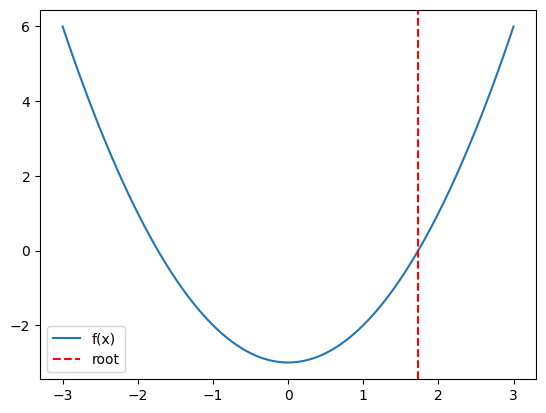

In [12]:
# fsolve demo 2D:

def f(x):
    return x**2 - 3

x0 = 1.5 # init guess
start_time = time.time()
root = fsolve(f, x0, xtol=1e-6)
end_time = time.time()
print("root: ", root)
print("time taken", end_time - start_time)

# Plot the function
x = np.linspace(-3, 3, 100)
y = f(x)
plt.plot(x, y, label='f(x)')

# Plot the root as a vertical line
plt.axvline(x=root, linestyle='--', color='r', label='root')

plt.legend()
plt.show()


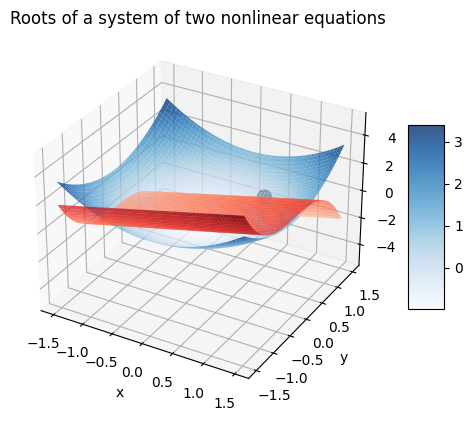

In [3]:
# fsolve demo 3D:

# Define the system of equations
def f(xy):
    x, y = xy
    return [x**2 + y**2 - 1, x - y**3]

# Define the x and y ranges for the plot
x_range = np.linspace(-1.5, 1.5, 100)
y_range = np.linspace(-1.5, 1.5, 100)

# Create a meshgrid from the x and y ranges
X, Y = np.meshgrid(x_range, y_range)

# Evaluate the system of equations on the meshgrid
F1, F2 = f([X, Y])

# Initialize a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the two equations as surfaces
surf1 = ax.plot_surface(X, Y, F1, cmap='Blues', alpha=0.8)
surf2 = ax.plot_surface(X, Y, F2, cmap='Reds', alpha=0.8)

# Find the roots of the system
xy0 = [0.5, 0.5]
roots = fsolve(f, xy0)

# Plot the roots as green points
ax.scatter(roots[0], roots[1], [0, 0], c='black', s=100)

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Roots of a system of two nonlinear equations')

# Add a colorbar for the surfaces
fig.colorbar(surf1, shrink=0.5, aspect=5)

# Show the plot
plt.show()


## brentq information:
algorithm specifically designed to find a single root of a function in a given interval using a combination of bisection and inverse quadratic interpolation. It is generally faster and more reliable than other root-finding algorithms in Scipy for finding a single root. It also requires only the function itself to be passed as input, making it simpler to use.

root:  1.732050807568875
time taken 5.7220458984375e-05


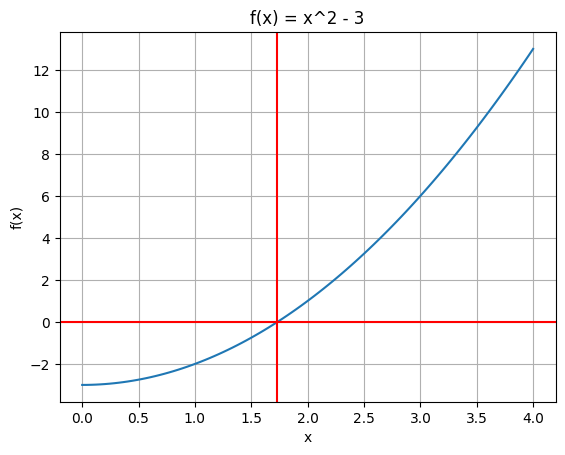

In [13]:
# brentq demo:

def f(x):
    return x**2 - 3

# Find the root of the function
start_time = time.time()
root = brentq(f, 1, 3)
end_time = time.time()
print("root: ", root)
print("time taken", end_time - start_time)

# Plot the function
x = np.linspace(0, 4, 100)
y = f(x)
plt.plot(x, y)

# Plot the root
plt.axhline(y=0, color='r', linestyle='-')
plt.axvline(x=root, color='r', linestyle='-')

plt.title('f(x) = x^2 - 3')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

## odeint information:

odeint is a numerical integration function in the scipy.integrate module of SciPy, which solves ordinary differential equations (ODEs) using a variety of numerical methods. It integrates a system of first-order ODEs represented in the form dy/dt = f(y, t) where y is a vector of dependent variables and t is the independent variable (time). odeint can handle stiff and non-stiff systems of ODEs with variable or constant coefficients. It offers a flexible interface for specifying the initial conditions, integration interval, and desired tolerances for the numerical solver. odeint is widely used in scientific and engineering applications, such as physics, chemistry, biology, and control systems, to simulate and analyze dynamic systems.

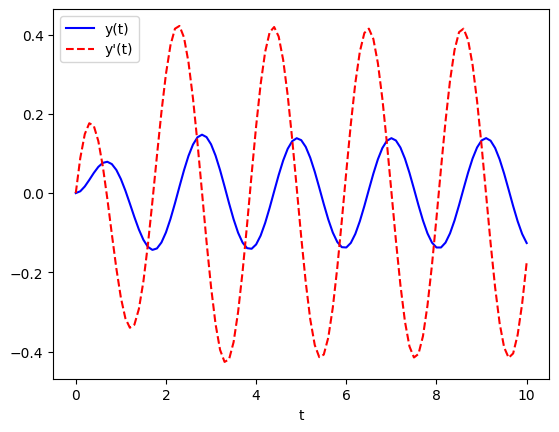

In [16]:
# odeint demo:
def f(y, t):
    y0, y1 = y
    dydt = [y1, -2*y1 - 5*y0 + np.cos(3*t)]
    return dydt

t = np.linspace(0, 10, 101)
y0 = [0, 0]
y = odeint(f, y0, t)

plt.plot(t, y[:, 0], 'b-', label='y(t)')
plt.plot(t, y[:, 1], 'r--', label="y'(t)")
plt.xlabel('t')
plt.legend()
plt.show()

## Questions and Experiment: 

I am curious on how fsolve decides which algorithm to use and how the time complexity varies. I think a benaficial experiemnt would be to learn more about fsolve and which functions it performs well on and when it dosnt. I could create a plot with the x axis being time and the y being degree or condition number and see how 'fsolve' behaves.